## Data Cleaning

In [25]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")

df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
259,80194704,TV Show,Car Masters: Rust to Riches,NaN,"Mark Towle, Shawn Pilot, Constance Nunes, Tony...",NaN,"September 14, 2018",2018,TV-PG,1 Season,Reality TV,The colorful crew at Gotham Garage overhauls a...
5479,81039073,TV Show,Kicko & Super Speedo,NaN,NaN,NaN,"April 1, 2019",2018,TV-Y7-FV,1 Season,"Kids' TV, TV Comedies",This high-energy animated series follows a gut...
2812,80999990,Movie,Holy Man 2,Note Chern-Yim,"Apisit Opasaimlikit, Suthep Po-ngam, Phichet I...",Thailand,"July 30, 2018",2008,TV-14,92 min,"Comedies, Faith & Spirituality, International ...",Former rap musician Joey Boy is now a monk who...
4568,80085567,Movie,The Monster of Mangatiti,John Banas,"Greta Gregory, Mark Mitchinson, Bruce Hopkins,...",New Zealand,"December 15, 2015",2015,TV-MA,70 min,Dramas,Real events are dramatized in the unthinkable ...
1058,80205593,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."


In [7]:
# Count the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

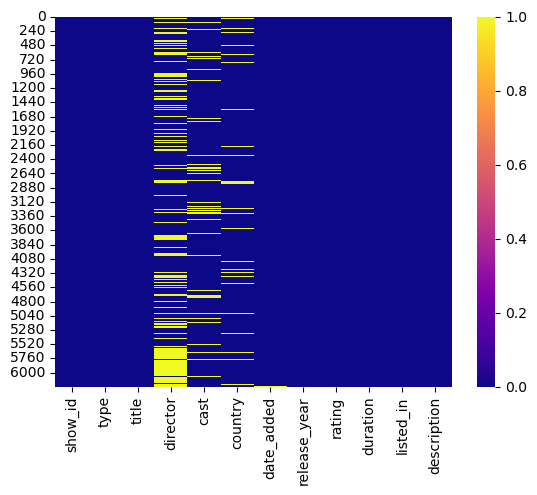

In [11]:
sns.heatmap(df.isnull(),cmap = 'plasma')

In [18]:
# Show the uniques values for rating
df.rating.value_counts()

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64

In [20]:
# Dropping the "director" and "cast" columns
df.drop(columns=["director","cast"],axis=1, inplace=True)

In [21]:
df.sample(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5790,80066080,TV Show,DC's Legends of Tomorrow,United States,"May 28, 2019",2018,TV-14,4 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","A mysterious ""time master"" from the future uni..."
1605,80217946,TV Show,Killer Ratings,NaN,"May 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Brazilian TV personality and politician Wallac...
970,80128338,TV Show,Chewin' the Fat,United Kingdom,"October 1, 2016",1999,TV-14,1 Season,"British TV Shows, TV Comedies","Petty criminals, dodgy decorators, full-bore G..."
2847,81032669,TV Show,Monty Don's French Gardens,United Kingdom,"July 26, 2019",2013,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",TV personality Monty Don visits France’s most ...
1292,81035108,Movie,Pimpal,India,"November 15, 2018",2017,TV-PG,92 min,"Dramas, Independent Movies, International Movies",As a lonely widower prepares to leave India to...


In [28]:
# Replace the NA's country with the most common country, besides the fact that netflix was created in the us
most_common_country = df.country.value_counts().index[0]
df['country'].replace(np.nan, most_common_country, inplace=True)
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

In [29]:
# We already hace the release year, therefore we can drop de data_added column
df.drop("date_added", axis=1, inplace=True)

In [30]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

In [32]:
# Replace the NA's rating with the most common rating
most_common_rating = df.rating.value_counts().index[0]
df['rating'].replace(np.nan, most_common_rating, inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   country       6234 non-null   object
 4   release_year  6234 non-null   int64 
 5   rating        6234 non-null   object
 6   duration      6234 non-null   object
 7   listed_in     6234 non-null   object
 8   description   6234 non-null   object
dtypes: int64(2), object(7)
memory usage: 438.5+ KB


In [34]:
df.sample(5)

,show_id,type,title,country,release_year,rating,duration,listed_in,description
1538,80128692,Movie,Tree Man,Canada,2015,TV-PG,82 min,Documentaries,Entrepreneurs from Vermont and Quebec sell Chr...
370,80061314,Movie,Incorruptible,"United States, Senegal",2015,TV-MA,90 min,Documentaries,"In the streets of Senegal, a youth movement ri..."
5351,80015799,Movie,Good Kill,United States,2014,R,103 min,Dramas,As Tommy Egan pilots armed drones over Afghani...
5052,80168033,Movie,SHOT! The Psycho-Spiritual Mantra of Rock,"United Kingdom, United States",2016,TV-MA,98 min,"Documentaries, Music & Musicals",Aptly named iconic rock photographer Mick Rock...
5005,80182274,Movie,Barbecue,"Australia, Armenia, Japan, Jordan, Mexico, Mon...",2017,TV-MA,101 min,"Documentaries, International Movies",A blend of cultural nuance and mesmerizing tec...


## Data Analysis

<Axes: xlabel='type', ylabel='count'>

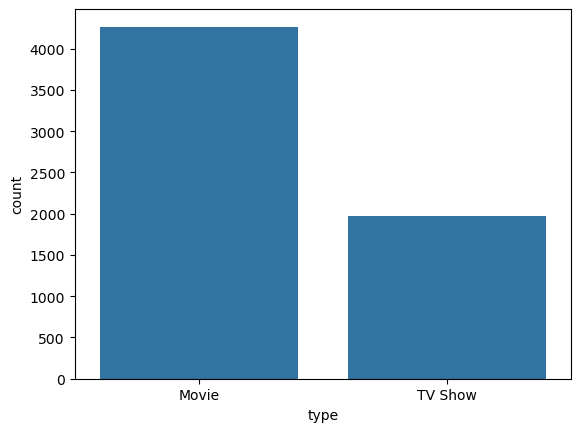

In [33]:
# Count by type
sns.countplot(x="type", data=df)

<Axes: xlabel='rating', ylabel='count'>

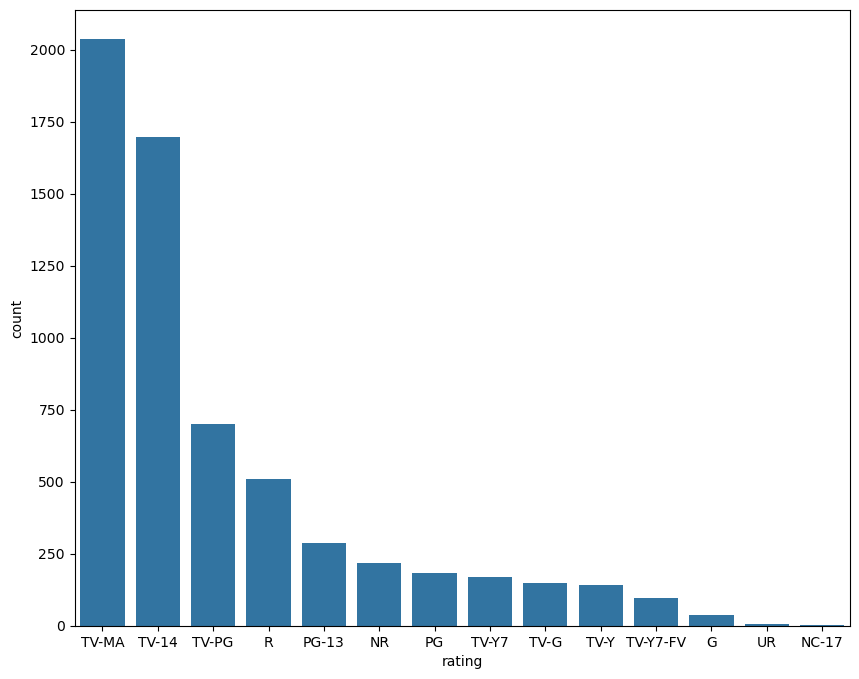

In [51]:
# Count by rating
plt.figure(figsize = (10,8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)

<Axes: xlabel='release_year', ylabel='count'>

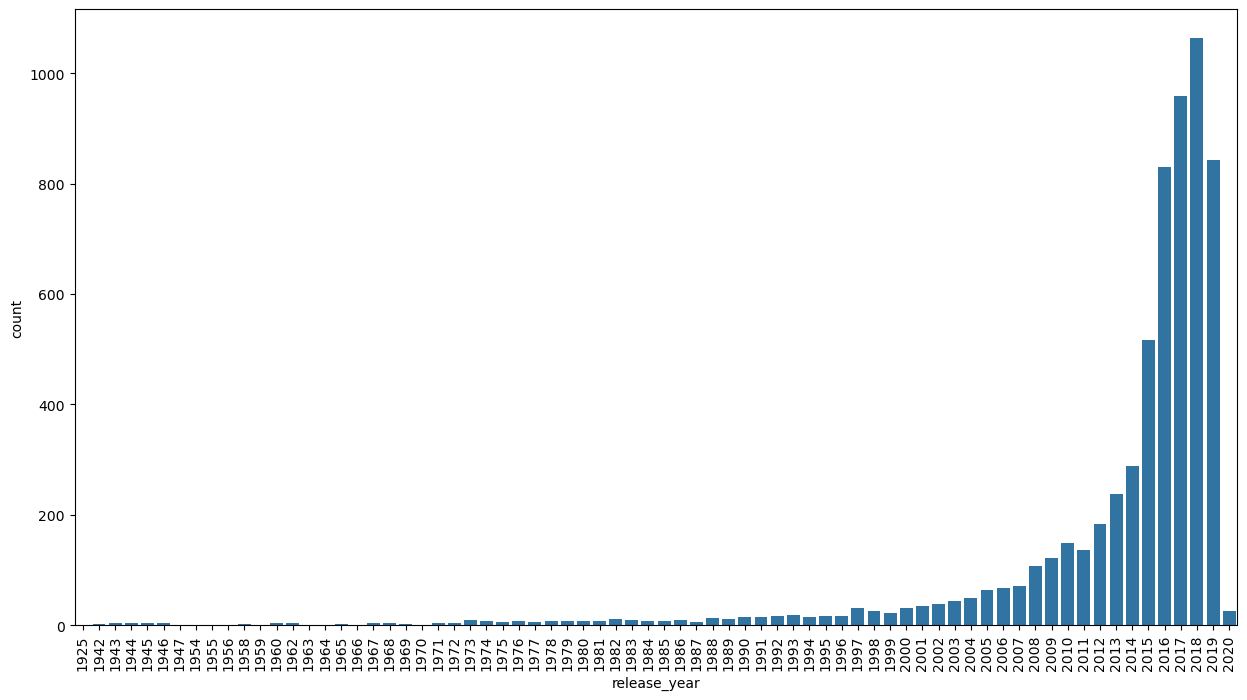

In [57]:
# Count by year
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.countplot(x='release_year', data=df)

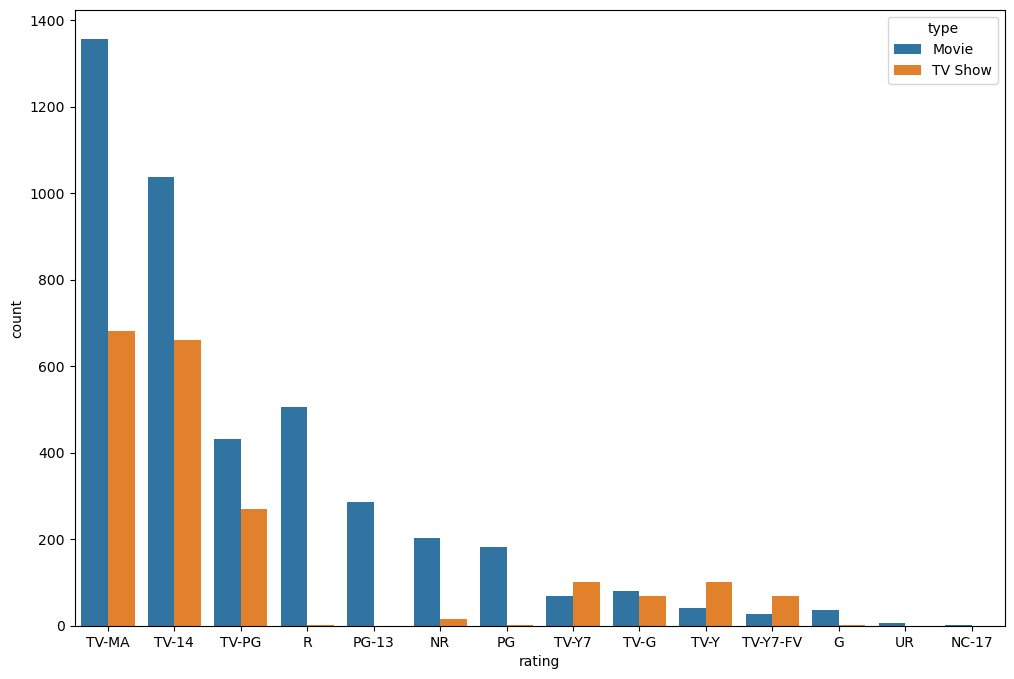

In [106]:
# View by type
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type', order=df['rating'].value_counts().index)
plt.show()

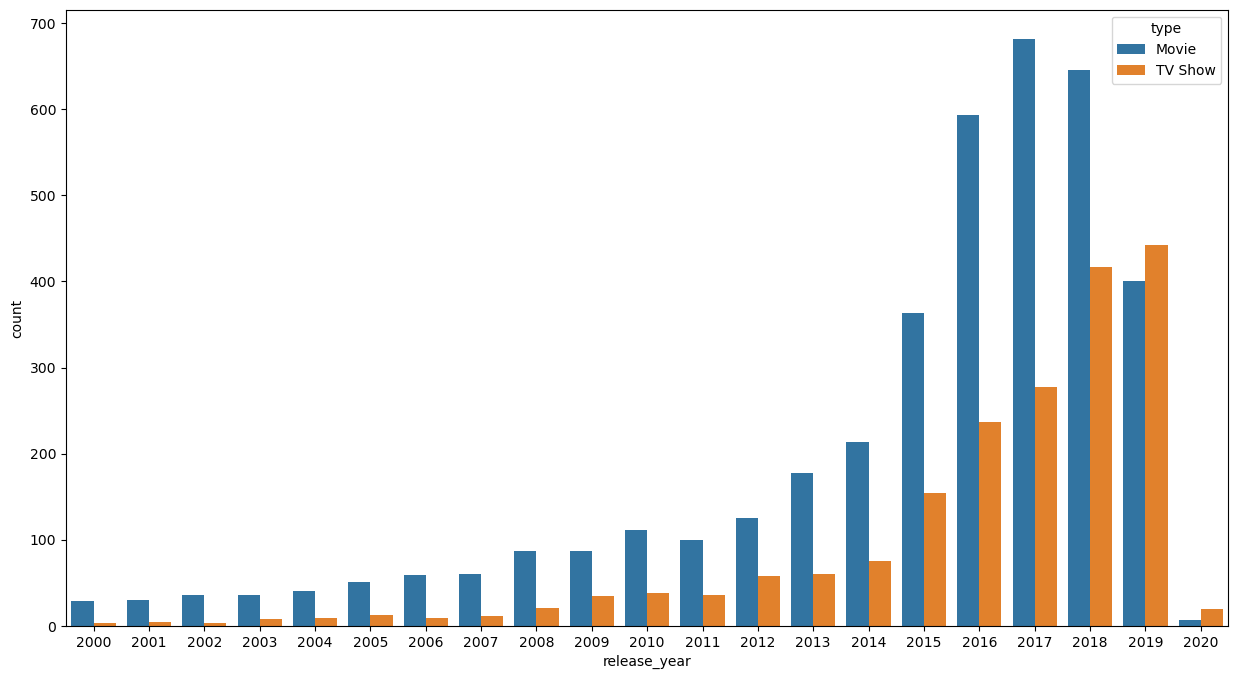

In [105]:
# View of the number of release by year and type
plt.figure(figsize = (15,8))
data = df[df['release_year'] >= 2000].sort_values(by='release_year', ascending=False)
sns.countplot(x='release_year', data=data, hue='type')
plt.show()

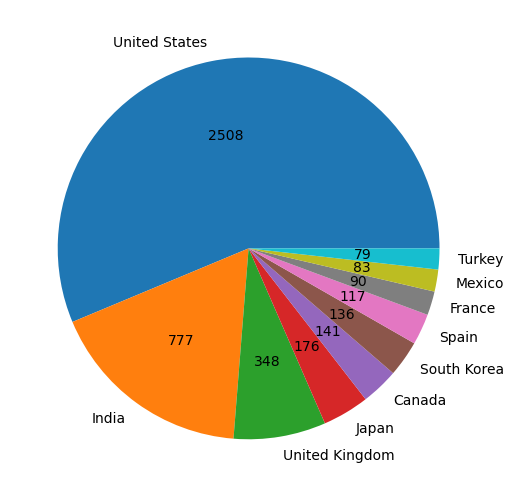

In [84]:
# Countries with most movies or tv shows released
most_common_countries = df['country'].value_counts().head(10)
patches, texts, autotexts = plt.pie(most_common_countries.values, labels=most_common_countries.index, autopct='%1.1f%%')

for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_text(most_common_countries.values[i])

plt.tight_layout(pad=0.1)
plt.show()

In [103]:
# Average movide duration in minutes
data = df[df['type'] == "Movie"].copy()
data['duration'] = data['duration'].str.extract(r'(\d+)').astype(int)
data['duration'].mean()

99.10082063305978

In [104]:
# Average TV Show duration in seasons
data = df[df['type'] == "TV Show"].copy()
data['duration'] = data['duration'].str.extract(r'(\d+)').astype(int)
data['duration'].mean()

1.7795835449466735